Several mathematical pendulum: Euler numerical integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

g = 9.81
N = 20                                                   # Pendulum number

lengths = np.linspace(1.0, 2.0, N)                      # Pendulum lengths
angles  = np.full(N, np.pi / 6)     # Pendulum initial angles

angular_velocities = np.zeros(N)                        # v0 = 0.0

t_max   = 100
dt      = 0.05  
n_steps = int(t_max / dt)

angles_history = np.zeros((N, n_steps))

angles_history[:, 0] = angles

# Explicit Euler 
for i in range(1, n_steps):
    for j in range(N):
        angular_acceleration = - (g / lengths[j]) * np.sin(angles_history[j, i - 1])
        
        angular_velocities[j] += angular_acceleration * dt
        angles_history[j, i] = angles_history[j, i - 1] + angular_velocities[j] * dt

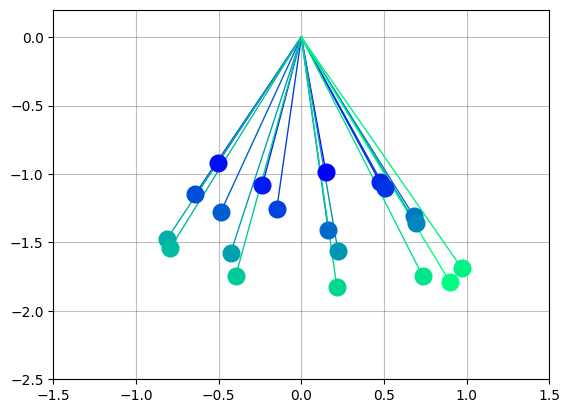

In [2]:
# Animation block

from matplotlib.cm import get_cmap

fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-2.5, 0.2)
ax.grid(color = 'black', alpha = 0.25)

# Pendulum colors
cmap = get_cmap('winter')  
colors = [cmap(i / (N - 1)) for i in range(N)]  

lines = [ax.plot([], [], lw=1, color=colors[i])[0] for i in range(N)]
bobs = [ax.plot([], [], 'o', color=colors[i], markersize=12)[0] for i in range(N)]

def init():
    for line, bob in zip(lines, bobs):
        line.set_data([], [])
        bob.set_data([], [])
    return lines + bobs

def update(frame):
    for j in range(N):
        x = lengths[j] * np.sin(angles_history[j, frame])
        y = -lengths[j] * np.cos(angles_history[j, frame])
        
        lines[j].set_data([0, x], [0, y])
        bobs[j].set_data(x, y)
    return lines + bobs

ani = FuncAnimation(fig, update, frames=n_steps, init_func=init, blit=True, interval=50)

ani.save('multi_pendulum.gif', writer='pillow', fps=20)

plt.show()